# Подбор алгоритма обучения

## Обоснование выбранного алгоритма

### YOLOv5

Предобученная модель YOLOv5  используется для задач обнаружения, сегментации, детекции. Использует достаточно малое кол-во памяти, но возвращает отличный результат, также тут имеет место скорость обучения. Данная модель проата для понимания и использования. 

Все эти параметры указаны в весах преобученной модели. 

Было скачено две категории весов yolov5n и yolov5s. Первые имеет 1.9M параметров, то есть нагрузка на ЦП достаточно маленькая, но тогда мы теряем качество. Вторые имеют 7.2М параметров, сильнее нагружет ЦП, но при этом возвращает лучший результат, при том что время используемое для обучения на маленьких данных разнится не сильно.

Оба этих файла отлично подходят для обнаружения объектов, но какой лучше с данными нам характеристиками ПК пока не известно, во время обучения модели будет произведено сравнение результатов, скорости и нагрузки на память и использование лучшего по сравнению.

В связи с тем что у нас ограниченное время на обучение и достаточно скудные характеристики ПК подходящие для обучения нейронной сети, было решено использовать веса yolov5n, так как для её обучения требуется меньшее количество времени

Пример работы YOLOv5:

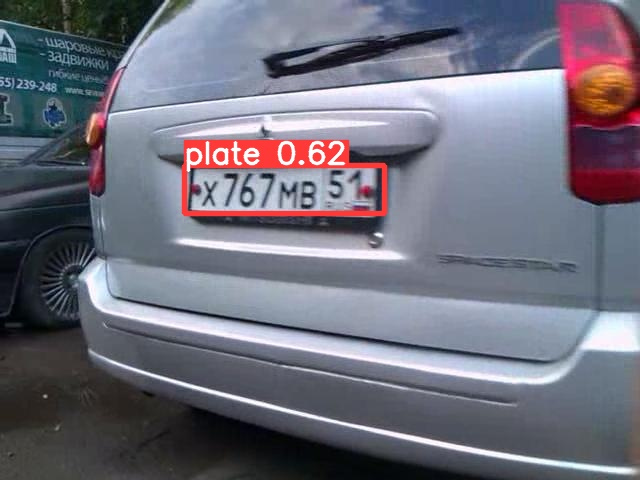

### Easy OCR

Преобученная модель на разных языках мира, предназначенная для считывания текта с картинок. Отлично считывает текст и цифры с картинок под углом, в перспективе, ну а также отлично считывает текст с хороших фото, под прямым углом и в хорошем качестве.

Для использывания данной модели ранее была скачена модель обученная на английском алфавите. Так как в автомобильной номере Российский Федерации используются буквы международного языка, признаным английским, которые по написанию похожи на Русские буквы, такие как O, M, B, C, X, K, H, A, P, T, E

## Применимость выбранного алгоритма

### YOLOv5

Данный алгоритм обучения нейронной сети ***отлично подходит для обнаружения объектов***, что является нашей первой задачей. Не использует чрезмерное количество памяти и удобен в использовании. Именно модель YOLOv5 и YOLOv8 являются отличными алгоритмами для выполнения поставленной задачи, но так как YOLOv8 достаточно новый алгоритм и не сбалансированный, будет использоваться алгоритм YOLOv5.

Пример работы YOLOv5:

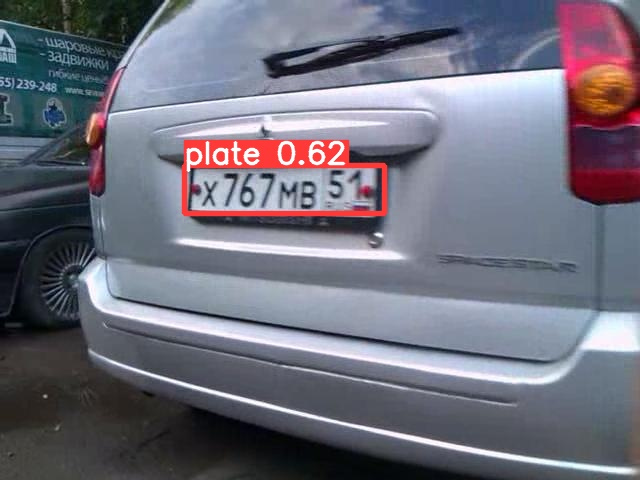

### Easy OCR

Данная библиотека (модель) отлично подходит для обнаружения текста на картинках и его чтения. Отлично работает на разных картинках в разном качестве, но как и все имеет свои погрешности.

Так как главной нашей задачей является распознавания текста, данная модель ***отлично подходит для реализации поставленной задачи***

## Подбор параметров

### YOLOv5

#### Параметры командной строки

В ***запуске обучения есть следующие доп. параметры***, каждый отвечает за свою конкретную задачу:

[-h] 

[--weights WEIGHTS]

[--cfg CFG] 

[--data DATA] 

[--hyp HYP]

[--epochs EPOCHS] 

[--batch-size BATCH_SIZE] 

[--imgsz IMGSZ]

[--rect] 

[--resume [RESUME]] 

[--nosave]

[--noval]

[--noautoanchor] 

[--noplots] 

[--evolve [EVOLVE]]

[--evolve_population EVOLVE_POPULATION]

[--resume_evolve RESUME_EVOLVE] 

[--bucket BUCKET]

[--cache [CACHE]] 

[--image-weights] 

[--device DEVICE]

[--multi-scale] 

[--single-cls] 

[--optimizer {SGD,Adam,AdamW}]

[--sync-bn] 

[--workers WORKERS] 

[--project PROJECT]

[--name NAME] 

[--exist-ok] 

[--quad] 

[--cos-lr]

[--label-smoothing LABEL_SMOOTHING]

[--patience PATIENCE]

[--freeze FREEZE [FREEZE ...]] 

[--save-period SAVE_PERIOD]

[--seed SEED] 

[--local_rank LOCAL_RANK] 

[--entity ENTITY]

[--upload_dataset [UPLOAD_DATASET]]

[--bbox_interval BBOX_INTERVAL]

[--artifact_alias ARTIFACT_ALIAS] 

[--ndjson-console]

[--ndjson-file]

В нашем случае мы будем самые главне параметры (чтобы не нагружать память), а именно:
1. --weiights - является параметром, который хранит в себе путь до весов модели
2. --epochs - является параметров, который хранит в себе количество эпох обучения
3. --data - является параметров, который хранит в себе путь до нашего файла yaml, который хранит информацию о хранении фотографий и разметки
4. --batch-size - размер батча 

Данные параметров будут следующие:
1. параметры которые не будут изменяться:
    1. --weights C:/Users/Participant/Desktop/lipatnikova/yolov5n.pt - даюы избежать переобучения, каждый раз мы будем использовать стандартные веса
    2. --data C:/Users/Participant/Desktop/lipatnikova/yolov5/datasets/data.yaml - наши данные не изменяются, соответственно данный параметр является неизменным
2. параметры, которые будут подбираться в ходе обучения:
    1. --epochs 5 - так как у нас ограниченное кол-во ресурсов, начинаем с самого малого, после посмотрев на результат будем изменять
    2. --batch-size 2 - так как у нас ограниченное кол-во ресурсов, начинаем с самого малого, после посмотрев результат будем изменять

#### Гиперпараметры

Также есть ***гиперпараметры*** в самой модели, такие как (все эти параметры являются данными из весов модели,  при обучении на наших данных они будут оптимизироваться под наш датасет):

0mlr0=0.01, 

lrf=0.01, 

momentum=0.937, 

weight_decay=0.0005, 

warmup_epochs=3.0, 

warmup_momentum=0.8,

warmup_bias_lr=0.1, 

box=0.05, 

cls=0.5, 

cls_pw=1.0, 

obj=1.0, 

obj_pw=1.0,

iou_t=0.2, 

anchor_t=4.0, 

fl_gamma=0.0, 

hsv_h=0.015, 

hsv_s=0.7, 

hsv_v=0.4, 

degrees=0.0, 

translate=0.1, 

scale=0.5, 

shear=0.0, 

perspective=0.0, 

flipud=0.0, 

fliplr=0.5, 

mosaic=1.0, 

mixup=0.0, 

copy_paste=0.0

#### Общее кол-во параметров во всех слоях

Также есть ***общие параметры*** в слоях модели, в первом файле (yolov5n) 1.9 М параметров, во втором (yolov5s) 7.2 M параметров

### Easy OCR

Данная библиотека для распознавания текста имеет след. параметры (через "=" указано значение по умолчанию):

lang_list, 

gpu=True, 

model_storage_directory=None,

user_network_directory=None,

detect_network="craft", 

recog_network='standard', 

download_enabled=True, 

detector=True, 

recognizer=True, 

verbose=True, 

quantize=True, 

cudnn_benchmark=False

В нашем случае м будем использовать только первый параметр (lang_list), который является параметром содержащим путь до фотографии с которой надо считать текст. В него будет записан путь до фотографии, которая получилась в ходе пропуска через модль обнаружения и обрезанная для более удобного считывания текста

# Импорт данных

### Определение обучающей, валидационной и тестовой выборки для YOLOv5

Для начала следует разделить наши преобработанные данные на обучающие, валидационные и тестовые и сохранить в разных папках. Приступим

Копируем в переменные отдельно фотографии и отдельно разметку

In [ ]:
import os

# копирование в переменную разметку
labels = [os.path.join('C:/Users/Participant/Desktop/lipatnikova/A/Data/object/labels', x) for x in os.listdir('C:/Users/Participant/Desktop/lipatnikova/A/Data/object/labels')]

# копирование в переменную фотографии
images = [os.path.join('C:/Users/Participant/Desktop/lipatnikova/A/Data/object/images', x) for x in os.listdir('C:/Users/Participant/Desktop/lipatnikova/A/Data/object/images')]

В ячейке ниже идёт создание папок для переноса наших данных

In [1]:
import os
# Создаем папки куда будем переносить наши разбитые на 3 набора данные фотографий
parent = 'C:/Users/Participant/Desktop/lipatnikova/B/Data'
dirs = 'images/train', 'images/val', 'images/test', 'labels/train', 'labels/val', 'labels/test'
for dir in dirs:
    path = os.path.join(parent, dir)
    # проверяем существование папки чтобы не создавать если уже есть
    if not os.path.exists(path):
        # создаем папку
        os.makedirs(path)

Теперь следует разделить сами наши данные

Так как по какой-то причине ранее скачанная библиотека удалилась, разделение данных будет выполнено в ручную, с примерным соотношением 70% - обучающие, 20% - валидационные, 10% - тестовые. Такое соотношение отлично работает и не даёт возможности переобучения (объяснение переобучения описано ниже в Импорт данных (фотографии) -> Yolov5 -> первая текстовая сноска)

***Перенос в папку images***

После переноса данных в ручную, в папке train - 8373 фотографии, test - 838, val - 1674

***Перенос в папку labels***

После переноса данных в ручную, в папке train - 8373 файла разметки, test - 838, val - 1674

## Импорт данных (фотографии)

В ходе выполнения данного модуля был произведён **полный импорт данных**

### YOLOv5

Для импорта фотографий в нашу модель следует использовать файл yaml, с путями до наших обучающих данных (требуются для обучения модели) и валидационных данных (требуются для проверки модели в ходе обучения (есть ли переобучение или нет? Если результат на валидационных данных ухудшается, а на обучающих увеличивается, значит модель переобучилась (запомнила наш датасет)))

***Структура файла формата yaml***

> train: 'B/Data/images/train' - путь до обучающих данных
>
> val: 'B/Data/images/val' - путь до валидацонных данных
>
> nc: 1 - количество классов
>
> path: 'C:/Users/Participant/Desktop/lipatnikova/B/' - путь до "корневой" папки
>
> names: ['plate',] - названия классов

### Easy OCR

Так как данная модель является уже обученной на том ж алфавите, что и предоставленные нам данные, импорт данных для неё не требуется, ***так как уже обученная на тех же данных***.

## Импорт разметки

### YOLOv5

В ходе выполнения данного модуля был выполнен **полный импорт разметки**

Импорт разметки также происходит с помощью файла yaml, даже с тем учётом что там прописаны пути до фотографий. Благодаря заранее проработанного алгоритма обучения, модель может найти ***путь до рзметки через один единственный файл***.

### Easy OCR

Следуя из пункта выше (Импорт данных (фотографии) - Easy OCR), данной модели не требуется данных для обучения, ***так как они же были использованы для её обучения***.

## Проверка импорта на ошибки

Для проверки импорта на ошибки требуется запустить нашу модель для обучения с минимальными требованиями.

In [ ]:
!python C:/Users/Participant/Desktop/lipatnikova/yolov5/train.py  --weights C:/Users/Participant/Desktop/lipatnikova/yolov5n.pt --epochs 1 --data C:/Users/Participant/Desktop/lipatnikova/yolov5/datasets/data.yaml --batch-size 2

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5


train: weights=C:/Users/Participant/Desktop/lipatnikova/yolov5n.pt, cfg=, data=C:/Users/Participant/Desktop/lipatnikova/yolov5/datasets/data.yaml, hyp=..\yolov5\data\hyps\hyp.scratch-low.yaml, epochs=1, batch_size=2, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=..\yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=..\yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  v7.0-294-gdb125a20 Python-3.12.2 torch-2.2.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, b

***Ошибок в ходе обучения не возникло значит данные импортируются корректно.***

# Обучение нейронной сети

## Использование заранее подготовленных данных

Во время выполнения выше стоящих пунктов, был произведён импорт данных в модель, для последующего её обучения (см. Подбор алгоритма обучения -> Импорт данных)

## Проверка импорта данных на ошибки

Для проверки импортируются ли наши данные корректно или нет, нужно запустить обучение сети на одну эпоху и с минимальным батчем (кол-во картинок обработанных за раз)

Для обучения нашей модели требуется запустить след. команду: 

In [10]:
!python C:/Users/Participant/Desktop/lipatnikova/yolov5/train.py  --weights C:/Users/Participant/Desktop/lipatnikova/yolov5n.pt --epochs 1 --data C:/Users/Participant/Desktop/lipatnikova/yolov5/datasets/data.yaml --batch-size 2

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5


train: weights=C:/Users/Participant/Desktop/lipatnikova/yolov5n.pt, cfg=, data=C:/Users/Participant/Desktop/lipatnikova/yolov5/datasets/data.yaml, hyp=..\yolov5\data\hyps\hyp.scratch-low.yaml, epochs=1, batch_size=2, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=..\yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=..\yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  v7.0-294-gdb125a20 Python-3.12.2 torch-2.2.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, b

***Ошибок в ходе обучения не возникло значит данные импортируются корректно***

## Стек разработки

> Библиотеки использующиеся для создания модели YOLOv5 - В данной библиотеки используются ранее установленные библиотеки в её файлах написанне опытными программистами, где каждая библиотека > > отвечает за то или иное действие (для проверки можете открыть файл по данному пути: lipatnikova\yolov5\train.py). Главными же библиотеками для работы с ней является ***torch и torcvision***


> Библиотеки использующие для создания модель EasyOCR - для работы с данной моделью требуется лишь одна библиотека, для самой работы с ней, а именно ***easyocr***

## Использование выбранного алгоритма обучения нейронной сети

### YOLOv5

Для ***использования ранее выбранного алгоритма*** требуется команда в командной строке, которая будет содержать путь до весов нашей предобученной модели, кол-во эпох, количество батчей, путь до файла хранящего данные, а также путь до файла train.py, который отвечает за само обучение.

Начинаем с epochs = 2 и batch-size = 2. Позже данные параметры будем менять

In [3]:
!python C:/Users/Participant/Desktop/lipatnikova/yolov5/train.py  --weights C:/Users/Participant/Desktop/lipatnikova/yolov5n.pt --epochs 2 --data C:/Users/Participant/Desktop/lipatnikova/yolov5/datasets/data.yaml --batch-size 2

^C


Так как обучение занимало достаточно много времени, было принято решение его остановить и попробовать поменять параметры

Поменяли параметры batch-size

In [ ]:
!python C:/Users/Participant/Desktop/lipatnikova/yolov5/train.py  --weights C:/Users/Participant/Desktop/lipatnikova/yolov5n.pt --epochs 2 --data C:/Users/Participant/Desktop/lipatnikova/yolov5/datasets/data.yaml --batch-size 20

Обучение было выполнено через терминал для отслеживания результатов в режиме реального времени и возможности параллельной работы.

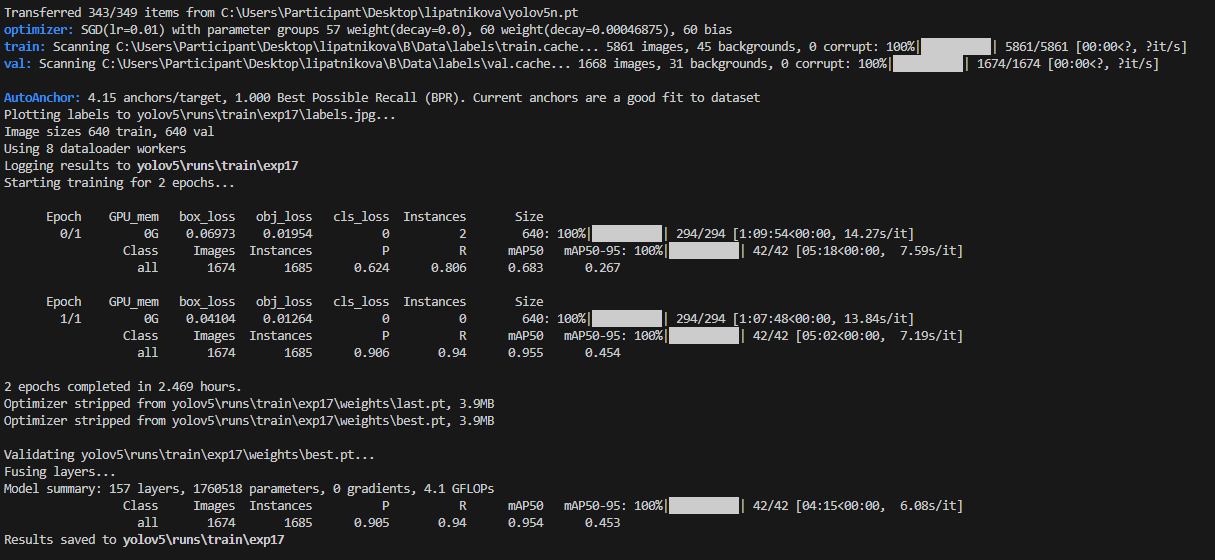

В связи с тем, что время ограничено оставляем данную модель и используем в дальнейшем

### Easy OCR

Для работы с данным алгоритмом следует импортировать библиотеку для работы с ней, а в ней забрать тот класс, благодаря которому и будет распознование текста, а именно класс Reader

In [9]:
from easyocr import Reader

Теперь следует загрузить нашу предобученную и заранее скачанную модель, обученную на английском алфавите.

In [ ]:
reader = Reader(['en',], gpu = False)

Проверяем считывает ли данная модель текст с картинок

In [15]:
all_text=''
# считываем текст
img_text  = reader.readtext('C:/Users/Participant/Desktop/lipatnikova/B/Data/images/test/23 (2).jpg')
# проходим по всему распознанному тексту на фотографии и сохраняем в единый файл и после выводим
for _, text, __ in img_text:
    all_text += text +' '
print(all_text)

197 RUS: E787MB Bopmctos 


## Использование памяти

Параметры модели такие как кол-во эпох и размер batcha позволяют модели YOLOv5 использовать умеренное количество памяти. То есть во время обучения модели есть возможность работать параллельно (дописывать код или работать в других приложениях)

## Анализ ошибок, если такие существуют

В ходе компиляции кода обучения нейронной сети, ***не было выявлено не одной ошибки или предупреждения.***

# Создание API

Само создание API будет производиться в другой файле с помощью библиотеки streamlit. Создаём файл api.py. 

Для запуска данного API требуется в командную строку ввести следующий код: streamlit run c:/Users/Participant/Desktop/lipatnikova/api.py

Во время работы с ни вы сможете вставлять пути до фотографий, а также интернет ссылки, также реализована возможность отправки фото с определённой папке.

## Ввод через путь:

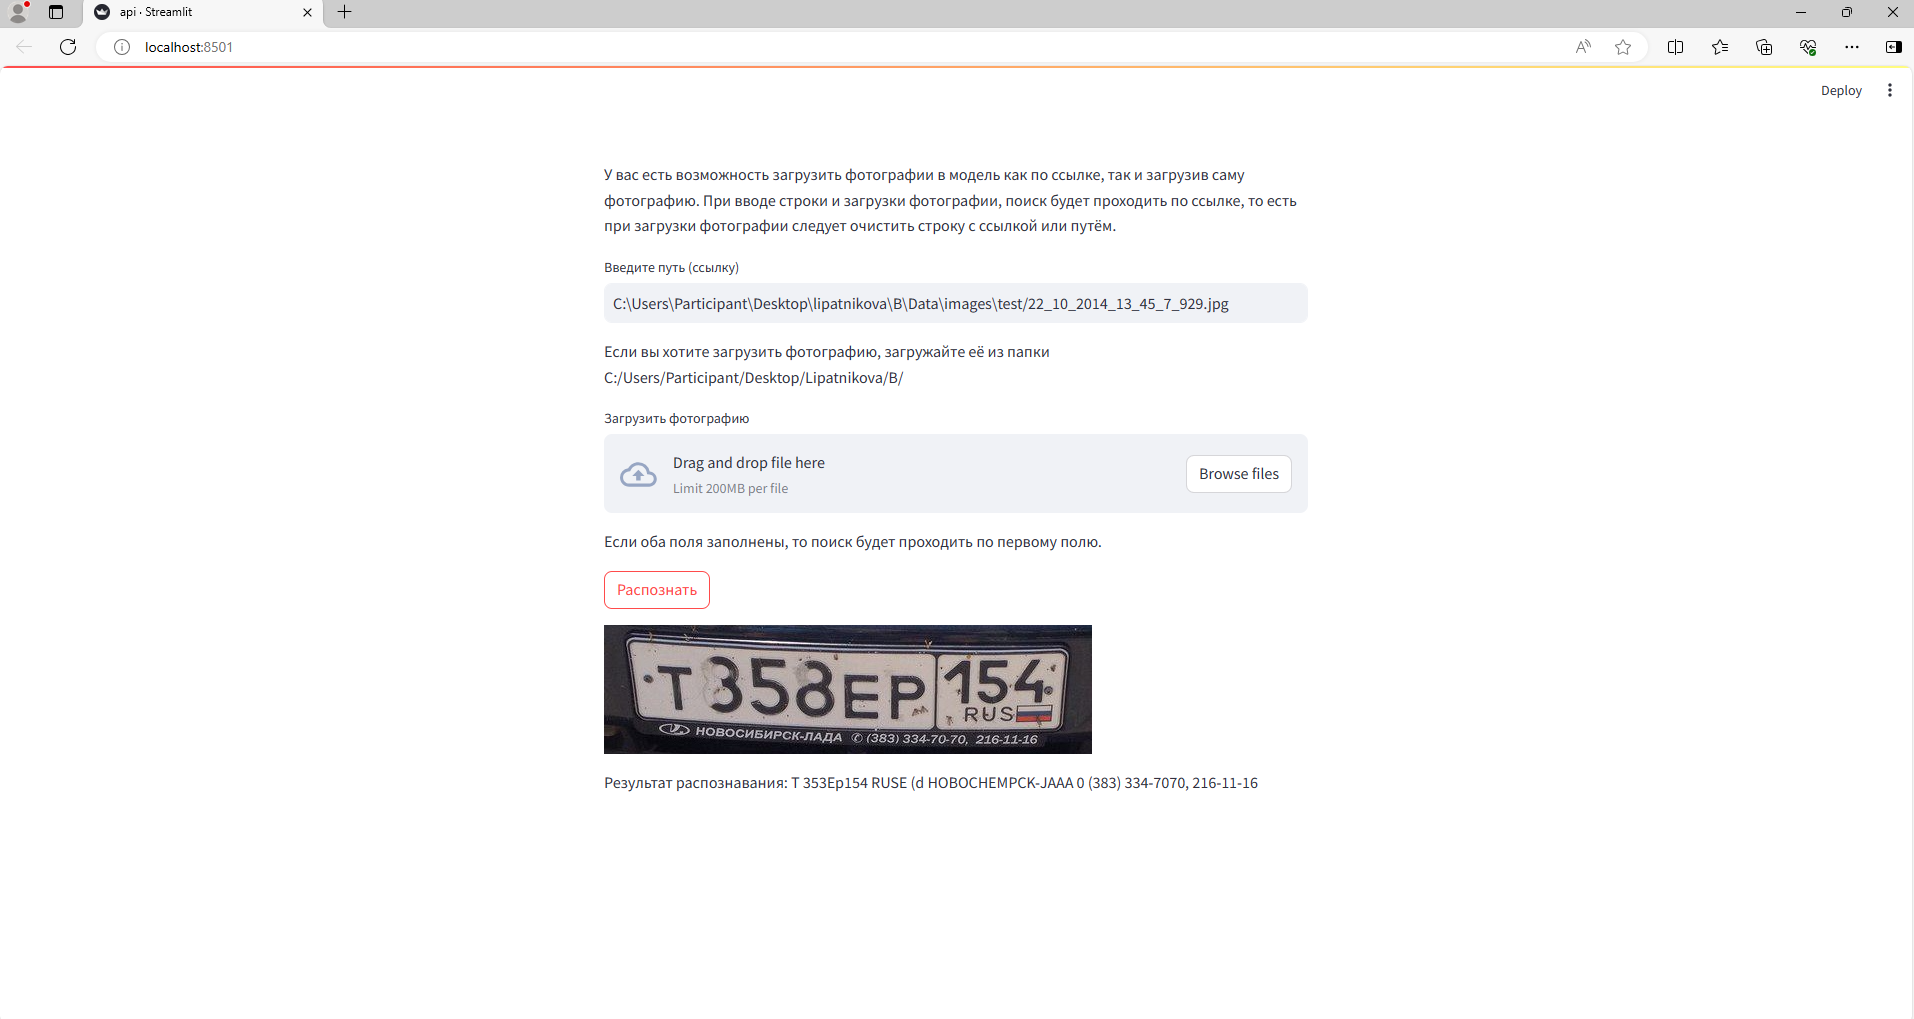

## Ввод через загрузку файла:

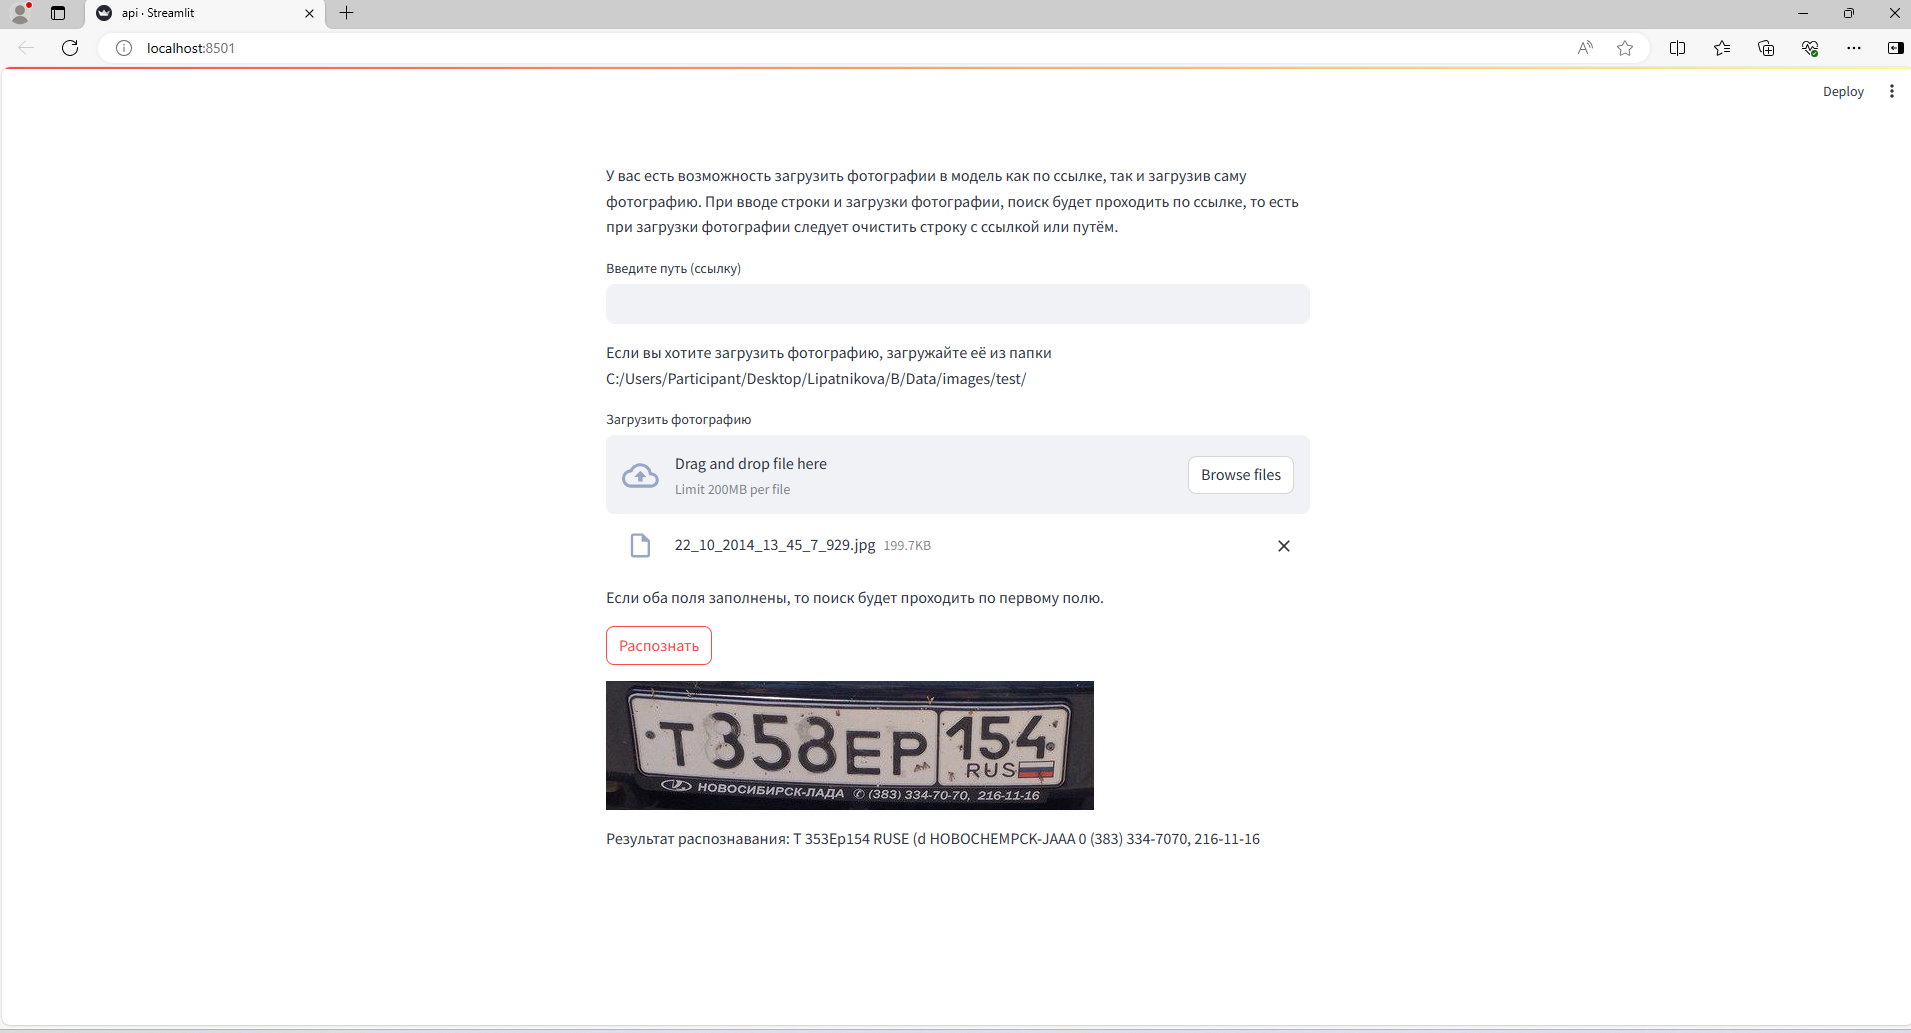

Чтобы закрыть сайт требуется нажать на командную строку и нажать ctrl + c

## ***Для проверки UNIT тестов требуется через командную строку запустить след. код:***

& C:/Users/Participant/AppData/Local/Programs/Python/Python312/python.exe c:/Users/Participant/Desktop/lipatnikova/unittest1.py

Во время некоторого количество выполнения будет показана лишь одна ошибка, это прогнозируемо, так как папка с результатом каждый раз меняется, в остальных же условиях наши функции отрабатывают как надо :D.

## Функция получения фото

In [ ]:
from yolov5.detect import run

def get_foto(link):
    # если папка существует то происходит следующее:
    try:
        path_foto = str(run(weights= 'C:/Users/Participant/Desktop/lipatnikova/yolov5/runs/train/exp17/weights/best.pt', source= link, save_crop= True, project='C:/Users/Participant/Desktop/lipatnikova/B/crop_foto' )) + '/crops/plate/' # отправляем полученный путь в модель, находим объект обрезаем и возвращаем путь до обрезанной папки
        """
        weights - веса нашей обученной модели 
        source - ресурс, ссылка на картинку или папку
        save_crop - параметр отвечающий за сохранение обрезанного фрагмента фото, на котором нашли объект
        project - путь куда будет сохраняться вся информация во время обнаружения объектов
        """
        imgs = os.listdir(path_foto)   # считываем картинки в папке
        return imgs, path_foto
    # если же папки не существует происходит это:
    except:
        return 'no', 'no'

## Описание функции получения фото

На вход данная функция получает путь к фотографиям.

В процессе выполнения функции путь к фотографиям загружаем в модель и получаем папку куда результат детекции был сохранён. Проверяем существует ли данный путь.

Если путь существует, то возвращаем обрезанные фотографии и путь к ним, если нет, то возвращаем значения «no», «no», что означает что объекта на фотографии нет.


## Unit тесты для функции получения фото

In [ ]:
import unittest

class TestGetResult(unittest.TestCase):
    # тест с обработкой корректных данных и корректного ответа
    def test_foto_one(self):
        self.assertEqual(get_foto('C:/Users/Participant/Desktop/lipatnikova/B/Data/images/test/23 (2).jpg'), (['23 (2).jpg'], ))
    # тест с обработкой некорректных данных и корректного ответа
    def test_foto_two(self):
        self.assertEqual(get_foto('no'), (['no', 'no']))

В первой функции мы вводим корректные данные и корректный результат, который нам должна вывести функция

Во второй функции мы вводим неправильные данные и корректный результат, который нам должна вывести функция

После выполнения кода будет выведен результат проведённых тестов и в случае ошибок в сравнении покажет на каком из тестов случилась ошибка и что именно он не смог сравнить.

### Описание работы UNIT тестов

Для проведения UNIT тестов требуется создать класс, в который будет передан класс TestCase, который представляет собой набор тест кейсов для любых данных, в нашем же случае мы его будем использовать для создания собственных кейсов.
```py
class TestGetResult(unittest.TestCase)
```

В созданном классе требуется создать наши функции (тесты) для проверки функции получения фото. Название этих функцй обязательно начинать с test.
```py
def test_foto_one(self)
```

После через переменную self обращаемся к классу и используем функцию assertEqual для создания собственного теста.

Пример использования с простыми данными:
```py
self.assertEqual((1 + 2), 3)
```
Во внутренние скобки мы вставляем что мы вводим (1, 2), после запятой же пишем какой результат должны получить (3)

## Функция отправки результата

In [ ]:
from PIL import Image

def get_text(images, path, reader):
    strok = []

    try:
        for img in images:
            image = Image.open(path + img) # данная переменная понадобиться в работе API для вывода обрезанной картинки
            img_text = reader.readtext(f'{path}{img}') # считываем текст с картинки
    except:
        image = Image.open('C:/Users/Participant/Desktop/lipatnikova/B/Untitled.png') 
        img_text=[(0, 'Текст не найден', 0)]

    final_text = ""

    for _, text, __ in img_text: # проходим по всему распознанному тексту
        final_text += text + ' ' # сохраняем текст с одной картинки в одну переменную
    strok.append(final_text) # добавляем в общий список картинок
    return strok[0], image # возвращаем картинку и данные по распознанному тексту


## Описание функции отправки результата

Данная функция на входе получает фотографии, путь к этим фотографиям и переменную, в которой хранится наша обученная модель для распознавания текста.

В процессе выполнения идёт отображение найденный фотографий и считывание с них текста. Если фотографии не найдены или путь оказывается неправильным, функция возвращает текст «Текст не найден» и возвращает фотографию с надписью «NO».

Дальше данная функция передаёт значения текста и фотографию.


## Unit тесты для функции отправки результата

In [18]:
import unittest
from easyocr import Reader
reader = Reader(['en',], gpu = False)

class TestGetResult(unittest.TestCase):
    # тест с обработкой корректных данных и корректного ответа
    def test_text_one(self):
        self.assertEqual(get_text('23 (2).jpg', 'C:/Users/Participant/Desktop/lipatnikova/B/Data/images/test/', reader)[0], '197 RUS: E787MB Bopmctos ')
    # тест с обработкой некорректных данных и корректного ответа
    def test_text_two(self):
        self.assertEqual(get_text('no', 'no', reader), 'Текст не найден')

Using CPU. Note: This module is much faster with a GPU.


### Описание работы UNIT тестов

Для проведения UNIT тестов требуется создать класс, в который будет передан класс TestCase, который представляет собой набор тест кейсов для любых данных, в нашем же случае мы его будем использовать для создания собственных кейсов.
```py
class TestGetResult(unittest.TestCase)
```

В созданном классе требуется создать наши функции (тесты) для проверки функции получения фото. Название этих функцй обязательно начинать с test.
```py
def test_text_one(self)
```

После через переменную self обращаемся к классу и используем функцию assertEqual для создания собственного теста.

Пример использования с простыми данными:
```py
self.assertEqual((1 + 2), 3)
```
Во внутренние скобки мы вставляем что мы вводим (1, 2), после запятой же пишем какой результат должны получить (3)

## Сохранение функций в отдельном файле для более удобной работы

Чтобы подключаться к нашим созданным функциям в API, их требуется сохранить в отдельном файле, как как импорт функций из файла формата ipynb не поддерживается

Обе функции сохраняем в файле function.py